## import some relevant libaries

In [389]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import warnings
import json
import random
import string
import os
%matplotlib inline
sns.set()

## read out the necessary files

In [390]:
samplesubmission=pd.read_csv('Updated_Sample_Submission.csv')
train=pd.read_csv('Update_train.csv')
test=pd.read_csv('Updated_Test.csv')
train_trimmed=pd.read_csv('Train_trimmed.csv')
test_trimmed=pd.read_csv('Updated_Test_trimmed.csv')

In [391]:
train.head()

,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,...,absorbance168,absorbance169,id,std,temperature,humidity,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human,donation_id
0,0.520883,0.528200,0.529795,0.537382,0.540265,0.546260,0.550882,0.558865,0.571352,0.585775,...,1.319344,1.278294,0,0.0026,39.27,44.17,low,ok,high,2250
1,0.529109,0.534852,0.541075,0.544269,0.546594,0.555183,0.561367,0.567637,0.582427,0.595801,...,1.282723,1.267465,1,0.0026,39.39,44.09,low,ok,high,2250
2,0.528434,0.532036,0.540413,0.541964,0.549347,0.555902,0.561458,0.567824,0.579568,0.593048,...,1.287730,1.266464,2,0.0026,39.50,44.00,low,ok,high,2250
3,0.530528,0.531880,0.539558,0.542433,0.549097,0.556224,0.561398,0.566963,0.577525,0.591982,...,1.314408,1.342224,3,0.0026,39.60,43.89,low,ok,high,2250
4,0.527530,0.536424,0.538207,0.541504,0.550546,0.555203,0.560394,0.567352,0.579438,0.592049,...,1.268710,1.216146,4,0.0026,39.70,43.83,low,ok,high,2250


In [392]:
train.columns

Index(['absorbance0', 'absorbance1', 'absorbance2', 'absorbance3',
       'absorbance4', 'absorbance5', 'absorbance6', 'absorbance7',
       'absorbance8', 'absorbance9',
       ...
       'absorbance168', 'absorbance169', 'id', 'std', 'temperature',
       'humidity', 'hdl_cholesterol_human', 'hemoglobin(hgb)_human',
       'cholesterol_ldl_human', 'donation_id'],
      dtype='object', length=178)

In [393]:
test.columns

Index(['Reading_ID', 'donation_id', 'absorbance0', 'absorbance1',
       'absorbance2', 'absorbance3', 'absorbance4', 'absorbance5',
       'absorbance6', 'absorbance7',
       ...
       'absorbance164', 'absorbance165', 'absorbance166', 'absorbance167',
       'absorbance168', 'absorbance169', 'id', 'std', 'temperature',
       'humidity'],
      dtype='object', length=176)

## checking out the data given

In [394]:
samplesubmission.head()

,Donation_ID,target
0,ID_1961_cholesterol_ldl_human,ok
1,ID_1961_hdl_cholesterol_human,ok
2,ID_1961_hemoglobin(hgb)_human,ok
3,ID_2067_cholesterol_ldl_human,ok
4,ID_2067_hdl_cholesterol_human,ok


In [395]:
samplesubmission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Donation_ID  183 non-null    object
 1   target       183 non-null    object
dtypes: object(2)
memory usage: 3.0+ KB


In [396]:
samplesubmission.describe()

,Donation_ID,target
count,183,183
unique,183,1
top,ID_3637_hdl_cholesterol_human,ok
freq,1,183


In [397]:
train.columns

Index(['absorbance0', 'absorbance1', 'absorbance2', 'absorbance3',
       'absorbance4', 'absorbance5', 'absorbance6', 'absorbance7',
       'absorbance8', 'absorbance9',
       ...
       'absorbance168', 'absorbance169', 'id', 'std', 'temperature',
       'humidity', 'hdl_cholesterol_human', 'hemoglobin(hgb)_human',
       'cholesterol_ldl_human', 'donation_id'],
      dtype='object', length=178)

In [398]:
train.describe()

,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,...,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,id,std,temperature,humidity,donation_id
count,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,...,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000
mean,0.501233,0.505343,0.509430,0.513951,0.520390,0.527901,0.534790,0.539878,0.547992,0.560161,...,1.256808,1.250286,1.247337,1.261093,1.249279,18395.467078,0.007525,41.243166,35.340352,6647.707819
std,0.154276,0.114408,0.108543,0.131905,0.130735,0.127874,0.115413,0.122235,0.120122,0.121974,...,0.147095,0.157714,0.165125,0.172043,0.142374,11516.122819,0.004625,2.833117,8.700879,3036.003039
min,-2.793790,-1.875939,-1.733555,-2.270881,-2.239499,-2.172958,-1.870428,-2.021362,-1.963416,-1.990968,...,-1.399953,-1.618211,-1.746980,-1.840234,-0.995391,0.000000,0.002400,30.480000,16.610000,1975.000000
25%,0.486140,0.488110,0.491822,0.496990,0.502719,0.509847,0.516403,0.522104,0.530236,0.542101,...,1.209375,1.198047,1.191282,1.200460,1.187413,7289.750000,0.004500,39.180000,28.300000,3593.000000
50%,0.509431,0.511737,0.515532,0.521206,0.527353,0.534120,0.540330,0.546182,0.554205,0.567028,...,1.259995,1.253789,1.251885,1.264090,1.250164,21499.500000,0.006100,41.200000,35.295000,6428.500000
75%,0.530501,0.532439,0.536944,0.542858,0.549445,0.556553,0.563126,0.568506,0.576613,0.589161,...,1.313490,1.312229,1.311609,1.328095,1.314102,28789.250000,0.008900,43.130000,41.190000,9326.000000
max,0.657782,0.652291,0.659153,0.658982,0.659410,0.667296,0.672708,0.680601,0.691116,0.704255,...,1.606844,1.586301,1.657884,1.672314,1.738621,36079.000000,0.028700,52.690000,67.820000,11906.000000


## exploratory data analysis

In [399]:
train.columns

Index(['absorbance0', 'absorbance1', 'absorbance2', 'absorbance3',
       'absorbance4', 'absorbance5', 'absorbance6', 'absorbance7',
       'absorbance8', 'absorbance9',
       ...
       'absorbance168', 'absorbance169', 'id', 'std', 'temperature',
       'humidity', 'hdl_cholesterol_human', 'hemoglobin(hgb)_human',
       'cholesterol_ldl_human', 'donation_id'],
      dtype='object', length=178)

In [400]:
test.columns

Index(['Reading_ID', 'donation_id', 'absorbance0', 'absorbance1',
       'absorbance2', 'absorbance3', 'absorbance4', 'absorbance5',
       'absorbance6', 'absorbance7',
       ...
       'absorbance164', 'absorbance165', 'absorbance166', 'absorbance167',
       'absorbance168', 'absorbance169', 'id', 'std', 'temperature',
       'humidity'],
      dtype='object', length=176)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hemoglobin(hgb)_human', ylabel='count'>

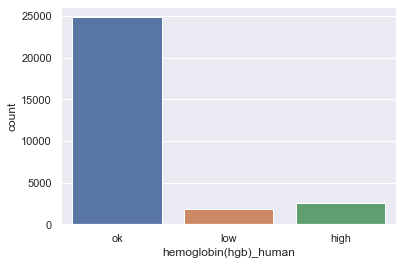

In [401]:
sns.countplot(train['hemoglobin(hgb)_human'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cholesterol_ldl_human', ylabel='count'>

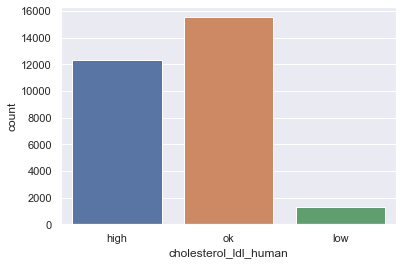

In [402]:
sns.countplot(train['cholesterol_ldl_human'])

<AxesSubplot:xlabel='hdl_cholesterol_human', ylabel='Count'>

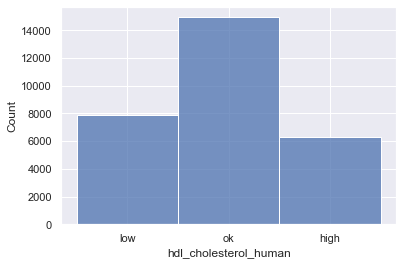

In [403]:
sns.histplot(train['hdl_cholesterol_human'])

In [404]:
newtrain=train.drop(['donation_id'],axis=1)

In [405]:
newtrain.columns

Index(['absorbance0', 'absorbance1', 'absorbance2', 'absorbance3',
       'absorbance4', 'absorbance5', 'absorbance6', 'absorbance7',
       'absorbance8', 'absorbance9',
       ...
       'absorbance167', 'absorbance168', 'absorbance169', 'id', 'std',
       'temperature', 'humidity', 'hdl_cholesterol_human',
       'hemoglobin(hgb)_human', 'cholesterol_ldl_human'],
      dtype='object', length=177)

In [406]:
newtrain.shape

(29160, 177)

In [407]:
nnewtrain=newtrain.to_numpy()

In [ ]:
features=np.array(nnewtrain [:,:174], dtype=float)
labels = nnewtrain[:,174:]

## Make i save my predictions

In [409]:
test.head()

,Reading_ID,donation_id,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,...,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,id,std,temperature,humidity
0,ID_KWUAQLRM,ID_2982,0.517951,0.520508,0.526852,0.531611,0.536816,0.543828,0.547761,0.554379,...,1.226695,1.210430,1.214422,1.200332,1.198297,1.248182,0,0.0027,37.09,27.22
1,ID_FN8SIVJJ,ID_2982,0.517839,0.522367,0.525186,0.534661,0.541900,0.546180,0.551687,0.556753,...,1.219627,1.216220,1.191416,1.202515,1.211942,1.242939,1,0.0027,37.20,27.17
2,ID_CI4TQCHI,ID_2982,0.517702,0.522018,0.527237,0.534374,0.541155,0.547152,0.549837,0.557513,...,1.237193,1.208477,1.208721,1.187810,1.209599,1.175631,2,0.0027,37.30,27.07
3,ID_URJMKNU7,ID_2982,0.525008,0.527439,0.536871,0.539636,0.546555,0.553183,0.558826,0.563549,...,1.218532,1.185708,1.196750,1.222484,1.177406,1.198399,3,0.0027,37.38,26.98
4,ID_HBJH67IS,ID_2982,0.520532,0.522683,0.526842,0.534634,0.539676,0.547488,0.552688,0.558355,...,1.206383,1.204950,1.203311,1.191351,1.157577,1.212008,4,0.0027,37.48,26.89


In [410]:
reading_id=test.Reading_ID.values
donation_id=test.donation_id.values
newtest=test.drop(['Reading_ID','donation_id'],axis=1)
nnewtest=newtest.to_numpy()

In [411]:
nnewtest.shape

(3660, 174)

## Basic Modelling

In [412]:
labels_n = np.zeros(labels.shape)
labels_n[np.where(labels=='low')] = 0
labels_n[np.where(labels=='ok')] = 1
labels_n[np.where(labels=='high')]= 2

In [413]:
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle

In [414]:
n_samples, n_features = features.shape
n_outputs = labels_n.shape[1]
n_classes = 3
forest = RandomForestClassifier(random_state=32)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)
model = multi_target_forest.fit(features, labels_n)

In [415]:
multi_target_forest.score(features, labels_n)

1.0

In [435]:
def mymultimodel(features):
    output = model.predict(features)
    return output

In [436]:
multipredictions=mymultimodel(nnewtest)
ss = pd.DataFrame()
ss["donation_id"] = donation_id
ss["hdl_cholesterol_human"] = multipredictions[:,0]
ss["hemoglobin(hgb)_human"] = multipredictions[:,1]
ss["cholesterol_ldl_human"] = multipredictions[:,2]

In [418]:
ss.head()

,donation_id,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human
0,ID_2982,1.0,1.0,1.0
1,ID_2982,1.0,1.0,1.0
2,ID_2982,0.0,1.0,1.0
3,ID_2982,0.0,1.0,1.0
4,ID_2982,1.0,1.0,1.0


In [437]:
def transform(value):
    if value ==0.0:
        return 'low'
    if value ==1.0:
        return 'ok'
    if value ==2.0:
        return 'high'

In [420]:
ss["hdl_cholesterol_human"]=ss["hdl_cholesterol_human"].apply(lambda x : transform(x))
ss["hemoglobin(hgb)_human"]=ss["hemoglobin(hgb)_human"].apply(lambda x : transform(x))
ss["cholesterol_ldl_human"]=ss["cholesterol_ldl_human"].apply(lambda x : transform(x))

In [421]:
ss.head()

,donation_id,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human
0,ID_2982,ok,ok,ok
1,ID_2982,ok,ok,ok
2,ID_2982,low,ok,ok
3,ID_2982,low,ok,ok
4,ID_2982,ok,ok,ok


## Converting my predictions

In [422]:
def transform_c_hdl(row):
    return str(row["donation_id"]) +"_hdl_cholesterol_human"+ "-"  +  (row["hdl_cholesterol_human"])

In [423]:
hdl_rows = pd.DataFrame(ss.apply(transform_c_hdl, axis=1))

In [424]:
def transform_hemo(row):
    return str(row["donation_id"]) + "_hemoglobin(hgb)_human" + "-"  + row["hemoglobin(hgb)_human"]

In [425]:
hemo_rows = pd.DataFrame(ss.apply(transform_hemo, axis=1))

In [426]:
def transform_c_ldl(row):
    return str(row["donation_id"])+"_cholesterol_ldl_human"+ "-"  + row["cholesterol_ldl_human"]

In [427]:
ldl_rows = pd.DataFrame(ss.apply(transform_c_ldl, axis=1))

In [428]:
ss = pd.concat([hdl_rows, hemo_rows, ldl_rows,]).reset_index(drop=True)

In [429]:
ss.head()

,0
0,ID_2982_hdl_cholesterol_human-ok
1,ID_2982_hdl_cholesterol_human-ok
2,ID_2982_hdl_cholesterol_human-low
3,ID_2982_hdl_cholesterol_human-low
4,ID_2982_hdl_cholesterol_human-ok


In [430]:
ss["target"] = ss[0].apply(lambda x: x.split("-")[1])
ss[0] = ss[0].apply(lambda x: x.split("-")[0])

In [431]:
ss=ss.rename(columns={0:'donation_id'})

In [432]:
ss.head()

,donation_id,target
0,ID_2982_hdl_cholesterol_human,ok
1,ID_2982_hdl_cholesterol_human,ok
2,ID_2982_hdl_cholesterol_human,low
3,ID_2982_hdl_cholesterol_human,low
4,ID_2982_hdl_cholesterol_human,ok


In [433]:
ss.to_csv('beseech.csv',index=False)

In [434]:
'alhamdulillah'

'alhamdulillah'